In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

dataset = load_boston()
x, t = dataset.data, dataset.target
columns = dataset.feature_names

/Users/hono/Desktop/python-datascience/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

In [7]:
type(x), x.shape, type(t), t.shape, columns

(numpy.ndarray,
 (506, 13),
 numpy.ndarray,
 (506,),
 array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'))

In [6]:
df = pd.DataFrame(x, columns=columns)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [8]:
df['Target'] = t
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [10]:
# scikit-learn を用いて機械学習アルゴリズムを実装を行う際には NumPy の ndarray に変換する必要があり、
# 現在の Pandas の DataFrame から .values の属性で取得することができます。
t = df['Target'].values
type(t)

numpy.ndarray

In [12]:
x = df.drop(labels=['Target'], axis=1).values
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [14]:
from sklearn.model_selection import train_test_split

# データを学習用とテスト用に7:3の割合で分ける
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [15]:
len(x_train),len(x_test)

(354, 152)

- Step1: モデルの定義
- Step2: モデルの学習
- Step3: モデルの検証

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [18]:
model.fit(x_train, t_train)

LinearRegression()

In [19]:
model.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

In [20]:
model.intercept_

37.93710774183255

<BarContainer object of 13 artists>

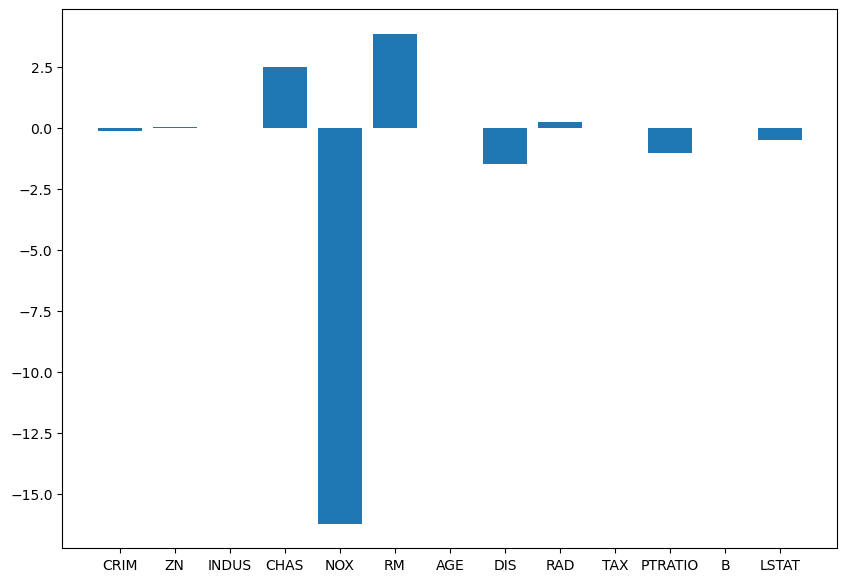

In [21]:
plt.figure(figsize=(10, 7))
plt.bar(x=columns, height=model.coef_)

In [25]:
# モデルの検証

print('train score: ',  model.score(x_train, t_train))
print('test score: ',  model.score(x_test, t_test))

train score:  0.7645451026942549
test score:  0.6733825506400193


In [26]:
y = model.predict(x_test)

y

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478,
       19.19148525, 20.5717479 , 21.21154015, 19.04572003, 20.35463238,
        5.44119126, 16.93688709, 17.15482272,  5.3928209 , 40.20270696,
       32.31327348, 22.46213268, 36.50124666, 31.03737014, 23.17124551,
       24.74815321, 24.49939403, 20.6595791 , 30.4547583 , 22.32487164,
       10.18932894, 17.44286422, 18.26103077, 35.63299326, 20.81960303,
       18.27218007, 17.72047628, 19.33772473, 23.62254823, 28.97766856,
       19.45036239, 11.13170639, 24.81843595, 18.05294835, 15.59712226,
       26.21043403, 20.81140432, 22.17349382, 15.48367365, 22.62261604,
       24.88561528, 19.74754478, 23.0465628 ,  9.84579105, 24.36378793,
       21.47849008, 17.62118176, 24.39160873, 29.95102691, 13.57219422,
       21.53645439, 20.53306273, 15.03433182, 14.3232289 , 22.11929299,
       17.07321915, 21.54141094, 32.96766968, 31.371599  , 17.7860591 ,
       32.75069556, 18.74795323, 19.21428022, 19.41970047, 23.08

In [27]:
print('予測値 : ', y[0])
print('目標値 : ', t_test[0])

予測値 :  24.935707898576815
目標値 :  22.6


## Redge回帰

In [36]:
from sklearn.linear_model import Ridge

# モデルの定義
ridge = Ridge(alpha=1)

# モデルの学習
ridge.fit(x_train, t_train)

# モデルの検証
print('train score: ',  ridge.score(x_train, t_train))
print('test score: ',  ridge.score(x_test, t_test))

train score:  0.7623440182689594
test score:  0.6665819091486689


Text(0.5, 1.0, 'Redge Regression')

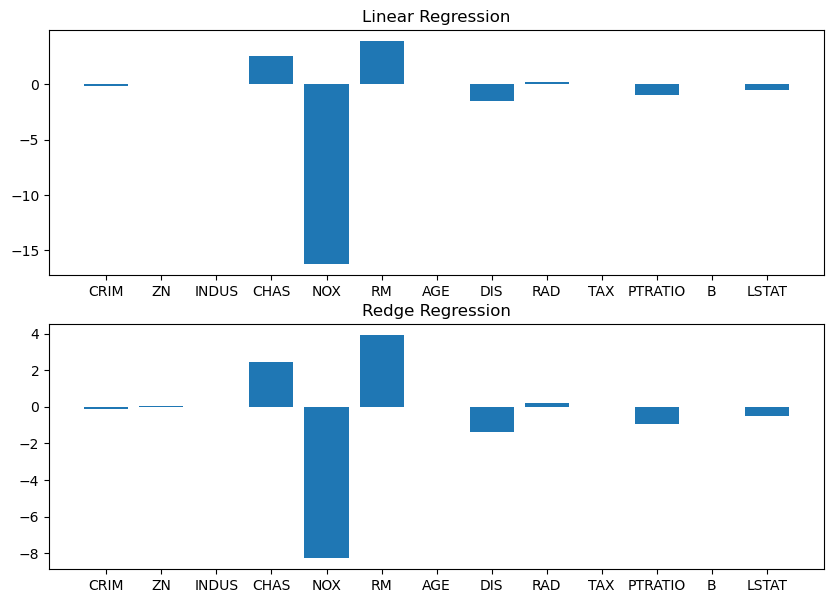

In [42]:
fig = plt.figure(figsize=(10, 7))

# 重回帰分析
ax1 = fig.add_subplot(2, 1, 1)
ax1.bar(x=columns, height=model.coef_)
ax1.set_title('Linear Regression')

# Redge回帰
ax2 = fig.add_subplot(2, 1, 2)
ax2.bar(x=columns, height=ridge.coef_)
ax2.set_title('Redge Regression')

## Lasson回帰

In [39]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)

lasso.fit(x_train, t_train)

print('train score: ',  lasso.score(x_train, t_train))
print('test score: ',  lasso.score(x_test, t_test))

train score:  0.7084095500978868
test score:  0.6115433359595557


In [40]:
print('元の特徴料の数 : ', x.shape[1])
print('Lasso の特徴料の数 : ', np.sum(lasso.coef_ != 0))

元の特徴料の数 :  13
Lasso の特徴料の数 :  10


In [41]:
lasso_005 = Lasso(alpha=0.05)

lasso_005.fit(x_train, t_train)

print('train score: ',  lasso_005.score(x_train, t_train))
print('test score: ',  lasso_005.score(x_test, t_test))

print('元の特徴料の数 : ', x.shape[1])
print('Lasso の特徴料の数 : ', np.sum(lasso_005.coef_ != 0))

train score:  0.7548928631432029
test score:  0.6541502573235292
元の特徴料の数 :  13
Lasso の特徴料の数 :  12


Text(0.5, 1.0, 'Lasso_005 Regression')

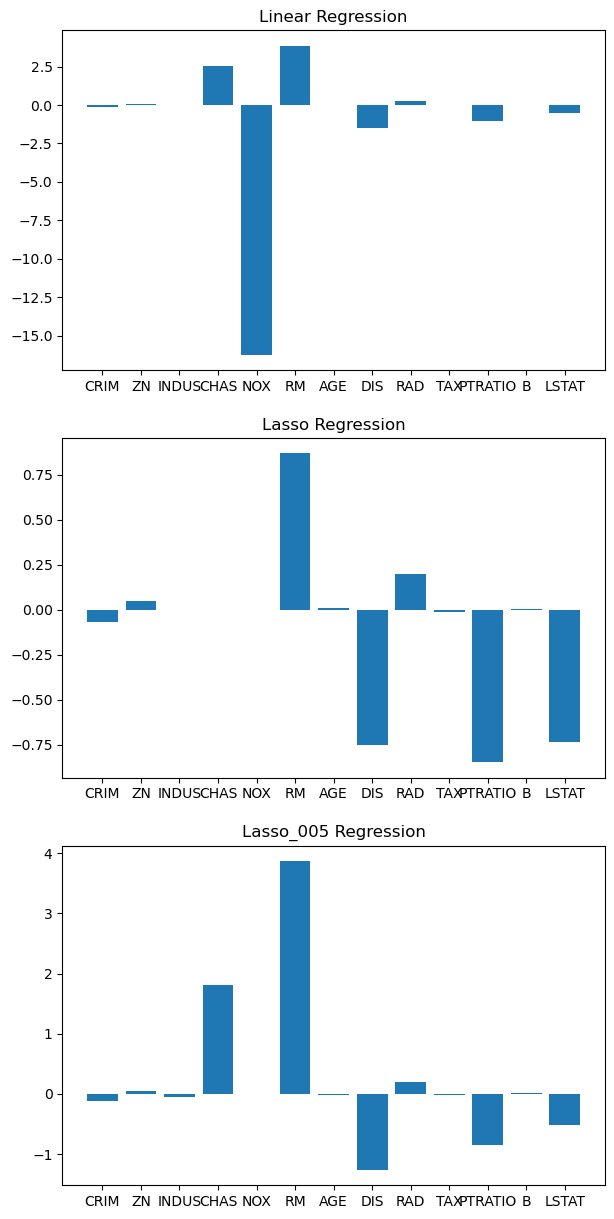

In [45]:
fig = plt.figure(figsize=(7, 15))

# 重回帰分析
ax1 = fig.add_subplot(3, 1, 1)
ax1.bar(x=columns, height=model.coef_)
ax1.set_title('Linear Regression')

# Lasso回帰
ax2 = fig.add_subplot(3, 1, 2)
ax2.bar(x=columns, height=lasso.coef_)
ax2.set_title('Lasso Regression')

# Lasso回帰
ax3 = fig.add_subplot(3, 1, 3)
ax3.bar(x=columns, height=lasso_005.coef_)
ax3.set_title('Lasso_005 Regression')

In [47]:
df = pd.read_csv('data/regression_pls.csv')
df.head(3)

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196
0,1.58,59.068,54.028,59.037114,24,0,0.213790,-0.369921,0.369921,0.213790,...,0,0,0,0,0,0,0,0,0,0
1,1.34,46.073,40.025,46.053098,20,0,-0.001725,-0.271722,0.271722,0.001725,...,0,0,0,0,0,0,0,0,0,0
2,1.22,60.052,56.020,60.021129,24,0,0.299685,-0.481433,0.481433,0.299685,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df.shape

(1290, 197)

In [50]:
x = df.drop('Target', axis=1).values
t = df['Target'].values

x,t

(array([[ 59.068     ,  54.028     ,  59.03711378, ...,   0.        ,
           0.        ,   0.        ],
        [ 46.073     ,  40.025     ,  46.05309819, ...,   0.        ,
           0.        ,   0.        ],
        [ 60.052     ,  56.02      ,  60.02112937, ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [276.338     , 264.242     , 276.0939004 , ...,   0.        ,
           0.        ,   0.        ],
        [464.217     , 463.209     , 459.7274992 , ...,   0.        ,
           0.        ,   0.        ],
        [464.217     , 463.209     , 459.7274992 , ...,   0.        ,
           0.        ,   0.        ]]),
 array([  1.58,   1.34,   1.22, ...,  -9.03, -10.26, -10.41]))

In [52]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [55]:
model = LinearRegression()

model.fit(x_train, t_train)

print('train score: ',  model.score(x_train, t_train))
print('test score: ',  model.score(x_test, t_test))

train score:  0.9365474966163977
test score:  -0.0103414898178249


In [56]:
df_corr = df.corr()
df_corr.head()

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196
Target,1.000000,-0.642326,-0.648078,-0.640489,-0.524453,NaN,0.111829,-0.360696,0.357026,0.113189,...,-0.032287,-0.015204,0.019244,-0.047169,NaN,0.007788,NaN,0.002448,-0.113820,0.043600
x1,-0.642326,1.000000,0.997571,0.999978,0.908895,NaN,0.322508,-0.117193,0.134074,0.298204,...,0.051291,0.186110,0.027947,-0.002219,NaN,0.001304,NaN,-0.015226,-0.038657,0.027857
x2,-0.648078,0.997571,1.000000,0.997252,0.883891,NaN,0.322631,-0.097297,0.115794,0.294947,...,0.047416,0.191792,0.029659,-0.007914,NaN,0.005912,NaN,-0.015106,-0.062823,0.027773
x3,-0.640489,0.999978,0.997252,1.000000,0.910855,NaN,0.324352,-0.120477,0.137237,0.300415,...,0.051542,0.186772,0.028046,-0.002001,NaN,0.001447,NaN,-0.015093,-0.038138,0.028359
x4,-0.524453,0.908895,0.883891,0.910855,1.000000,NaN,0.385792,-0.284647,0.293981,0.382603,...,0.044125,0.174983,0.022996,0.018780,NaN,-0.010834,NaN,-0.016378,0.027813,0.055553


<AxesSubplot:>

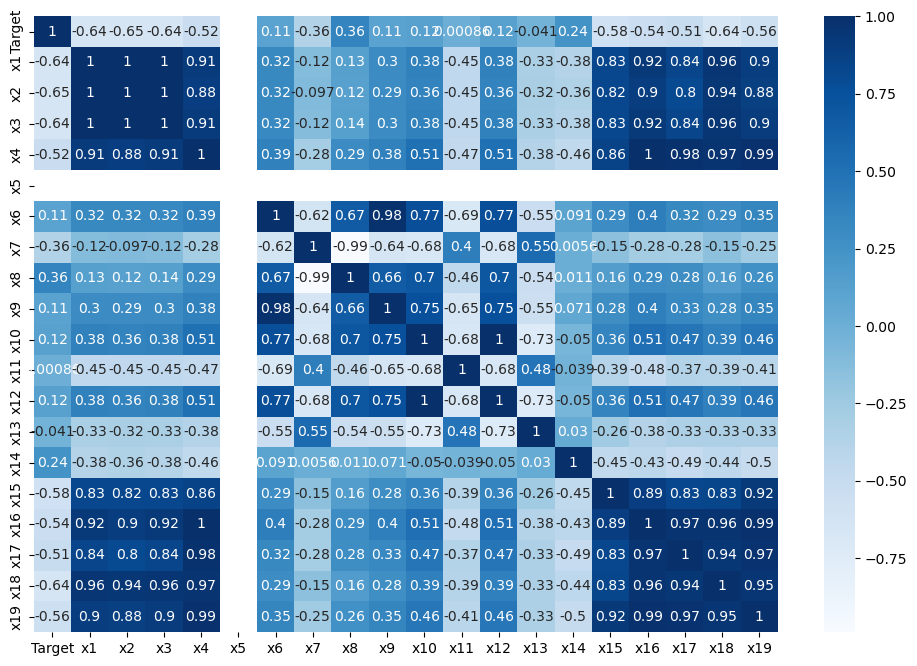

In [58]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.iloc[:20, :20], annot=True, cmap='Blues')

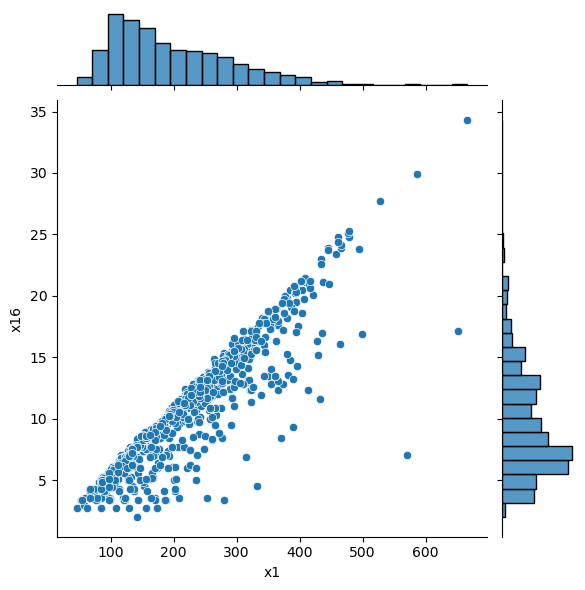

In [59]:
sns.jointplot(x='x1', y='x16', data=df)

In [60]:
from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression(n_components=7)

pls.fit(x_train, t_train)

print('train score: ',  pls.score(x_train, t_train))
print('test score: ',  pls.score(x_test, t_test))

train score:  0.906376310202351
test score:  0.7387281471807332


## 前処理

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('data/insurance.csv')
df.head(3)

,age,gender,bmi,children,smoker,region,rank,charges
0,19,female,27.90,0,yes,southwest,A,16884.924
1,18,male,33.77,1,no,southeast,NaN,NaN
2,28,male,33.00,3,no,southeast,NaN,NaN


In [64]:
t = df['charges'].values
x = df.drop(['charges'], axis=1).values

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_val, t_train, t_val = train_test_split(x, t, test_size=0.3, random_state=1)

In [66]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, t_train)

ValueError: could not convert string to float: 'male'

## 重複行の確認

In [67]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [68]:
df.duplicated().value_counts()

False    1338
dtype: int64

## 欠損処理

In [70]:
## 欠損値の除去
df.isnull()

,age,gender,bmi,children,smoker,region,rank,charges
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,True,True
3,False,False,False,False,True,False,True,False
4,False,False,True,False,True,False,True,True
...,...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,True,False
1334,False,False,False,False,False,False,True,False
1335,False,False,False,False,False,False,True,False
1336,False,False,False,False,False,False,True,False


In [71]:
df.isnull().sum()

age            0
gender         0
bmi           77
children       0
smoker        92
region         0
rank        1296
charges       13
dtype: int64

In [72]:
df.shape

(1338, 8)

In [73]:
df = df.dropna(subset=['charges'])

In [74]:
df.shape

(1325, 8)

In [76]:
df = df.drop(labels='rank', axis=1)

KeyError: "['rank'] not found in axis"

In [77]:
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
3,33,male,22.705,0,NaN,northwest,21984.47061
9,60,female,NaN,0,no,northwest,28923.13692
11,62,female,26.290,0,yes,southeast,27808.72510
13,56,female,39.820,0,no,southeast,11090.71780
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 欠損値補完

In [78]:
df.isnull().sum()

age          0
gender       0
bmi         73
children     0
smoker      89
region       0
charges      0
dtype: int64

(array([ 30., 120., 211., 301., 260., 195.,  86.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

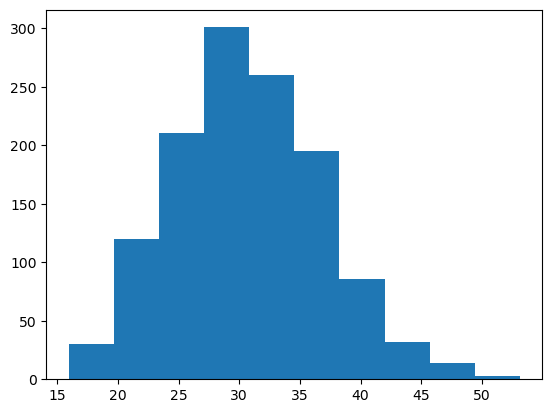

In [79]:
plt.hist(df['bmi'])

In [80]:
df['bmi'].mean()

30.71643370607028

In [81]:
df = df.fillna({'bmi': df['bmi'].mean()})

In [83]:
df.isnull().sum()

age          0
gender       0
bmi          0
children     0
smoker      89
region       0
charges      0
dtype: int64

In [84]:
df['smoker'].unique()

array(['yes', nan, 'no'], dtype=object)

In [85]:
df['smoker'].mode()[0]

'no'

In [88]:
df = df.fillna({'smoker': df['smoker'].mode()[0]})
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900000,0,yes,southwest,16884.92400
3,33,male,22.705000,0,no,northwest,21984.47061
9,60,female,30.716434,0,no,northwest,28923.13692
11,62,female,26.290000,0,yes,southeast,27808.72510
13,56,female,39.820000,0,no,southeast,11090.71780
...,...,...,...,...,...,...,...
1333,50,male,30.970000,3,no,northwest,10600.54830
1334,18,female,31.920000,0,no,northeast,2205.98080
1335,18,female,36.850000,0,no,southeast,1629.83350
1336,21,female,25.800000,0,no,southwest,2007.94500


In [89]:
df.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## カテゴリカル変数の取り扱い

In [90]:
df_obj = df.select_dtypes(include='object')

In [91]:
df_obj.head()

,gender,smoker,region
0,female,yes,southwest
3,male,no,northwest
9,female,no,northwest
11,female,yes,southeast
13,female,no,southeast


In [92]:
df_uni = df_obj.nunique()

df_uni

gender    2
smoker    2
region    4
dtype: int64

In [93]:
for uni in df_obj.columns:
    print(uni)
    print(df_obj[uni].unique())

gender
['female' 'male']
smoker
['yes' 'no']
region
['southwest' 'northwest' 'southeast' 'northeast']


## Label Encoding

In [94]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df['gender'])

le.transform(df['gender'])

array([0, 1, 0, ..., 0, 0, 0])

In [95]:
df['gender'] = le.transform(df['gender'])

df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900000,0,yes,southwest,16884.92400
3,33,1,22.705000,0,no,northwest,21984.47061
9,60,0,30.716434,0,no,northwest,28923.13692
11,62,0,26.290000,0,yes,southeast,27808.72510
13,56,0,39.820000,0,no,southeast,11090.71780


In [96]:
le.classes_

array(['female', 'male'], dtype=object)

In [97]:
df_uni

gender    2
smoker    2
region    4
dtype: int64

In [102]:
df_cols = df_uni[df_uni == 2].index # ユニークの値が2種類の列名のみ取得

for col in df_cols:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [103]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900000,0,1,southwest,16884.92400
3,33,1,22.705000,0,0,northwest,21984.47061
9,60,0,30.716434,0,0,northwest,28923.13692
11,62,0,26.290000,0,1,southeast,27808.72510
13,56,0,39.820000,0,0,southeast,11090.71780


## one-Hot Encoding

In [105]:
df.shape

(1325, 7)

In [106]:
df = pd.get_dummies(df, drop_first=True)

In [107]:
df.shape

(1325, 9)

In [109]:
df.head()

,age,gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900000,0,1,16884.92400,0,0,1
3,33,1,22.705000,0,0,21984.47061,1,0,0
9,60,0,30.716434,0,0,28923.13692,1,0,0
11,62,0,26.290000,0,1,27808.72510,0,1,0
13,56,0,39.820000,0,0,11090.71780,0,1,0


In [113]:
t = df['charges'].values
x = df.drop(['charges'], axis=1).values

x_train, x_val, t_train, t_val = train_test_split(x, t, test_size=0.3, random_state=1)

model = LinearRegression()
model.fit(x_train, t_train)

LinearRegression()

## データ前処理応用

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data/car_price.csv')
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [5]:
df.shape

(205, 26)

In [6]:
## 欠損値の確認
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
# 欠損値行を削除
df = df.dropna(subset=['price', 'horsepower', 'peak-rpm'])
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [9]:
# 欠損値列を削除
df = df.drop(labels='normalized-losses', axis=1)
df.head(3)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


(array([ 1.,  1.,  8., 35., 39., 24., 25., 42., 17.,  3.]),
 array([2.54, 2.68, 2.82, 2.96, 3.1 , 3.24, 3.38, 3.52, 3.66, 3.8 , 3.94]),
 <BarContainer object of 10 artists>)

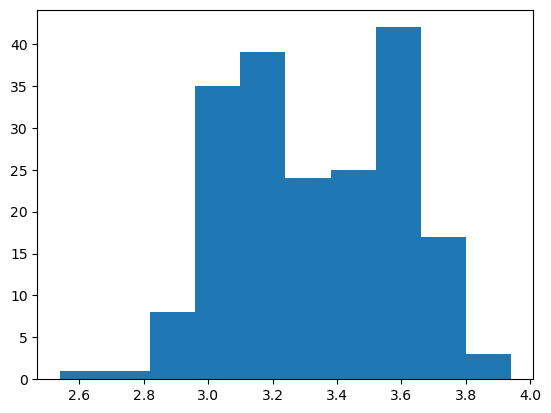

In [10]:
plt.hist(df['bore'].dropna())

(array([ 3.,  1., 13.,  7., 27., 52., 70., 15.,  5.,  2.]),
 array([2.07, 2.28, 2.49, 2.7 , 2.91, 3.12, 3.33, 3.54, 3.75, 3.96, 4.17]),
 <BarContainer object of 10 artists>)

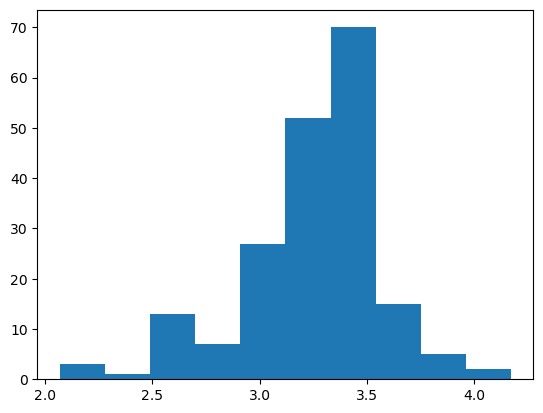

In [11]:
plt.hist(df['stroke'].dropna())

In [14]:
# 平均値で補完
df = df.fillna({'bore': df['bore'].mean(), 'stroke': df['stroke'].mean()})
df.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [15]:
df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [17]:
df['num-of-doors'].mode()[0]

'four'

In [19]:
df = df.fillna({'num-of-doors': df['num-of-doors'].mode()[0]})
df.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [21]:
## カテゴリカル変数処理
df_obj = df.select_dtypes(include='object')
df_obj.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [22]:
df_uni = df_obj.nunique()

df_uni

make                21
fuel-type            2
aspiration           2
num-of-doors         2
body-style           5
drive-wheels         3
engine-location      2
engine-type          6
num-of-cylinders     7
fuel-system          8
dtype: int64

In [23]:
df_cols = df_uni[df_uni == 2].index

df_cols

Index(['fuel-type', 'aspiration', 'num-of-doors', 'engine-location'], dtype='object')

In [24]:
from sklearn.preprocessing import LabelEncoder

for col in df_cols:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [25]:
df = pd.get_dummies(df, drop_first=True)

df.head()

,symboling,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [26]:
## 重回帰分析の実装
t = df['price'].values
x = df.drop(['price'], axis=1).values

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=1)

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, t_train)

print('train score: ',  model.score(x_train, t_train))
print('test score: ',  model.score(x_test, t_test))

train score:  0.9734120796250461
test score:  0.8617805165929411


## 特徴量エンジニアリング

In [29]:
class_3 = ['audi', 'bmw', 'jaguar', 'mercedes-benz', 'porsche']
class_2 = ['alfa-romero', 'chevrolet',  'mercury', 'volvo', 'toyota', 'plymouth', 'dodge']
class_1 = ['honda', 'isuzu', 'mazda', 'mitsubishi', 'nissan', 'peugot', 'saab', 'subaru', 'volkswagen']

In [30]:
maker_class = []

for i in df_obj['make']:
    if i in class_3:
        maker_class.append(3)
    elif i in class_2:
        maker_class.append(2)
    else:
        maker_class.append(1)
        

In [35]:
df_obj['make'][:10]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
10            bmw
Name: make, dtype: object

In [36]:
df2 = df.copy()
df2['maker_class'] = maker_class


In [37]:
t = df2['price'].values
x = df2.drop('price', axis=1).values

x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=1)

model = LinearRegression()
model.fit(x_train, t_train)

print('train score: ',  model.score(x_train, t_train))
print('test score: ',  model.score(x_test, t_test))

train score:  0.973412079625046
test score:  0.8620181200019459


## 外れ値除去

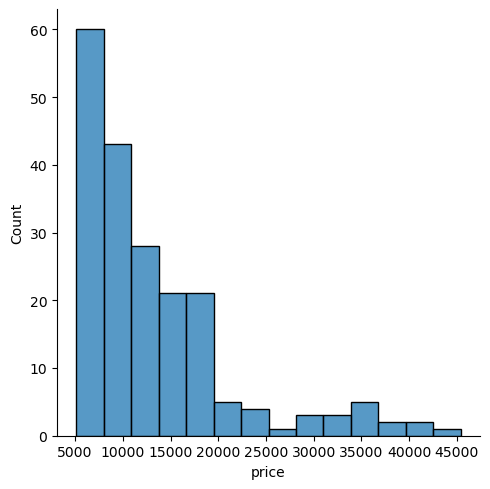

In [38]:
sns.displot(df['price'])

In [39]:
mu = df['price'].mean()
sigma = df['price'].std()

mu, sigma

(13243.43216080402, 7978.707608706005)

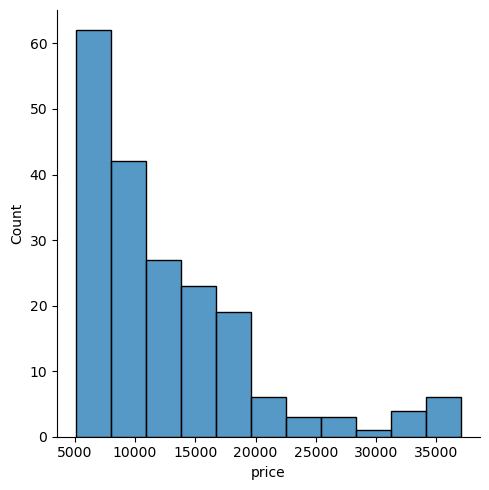

In [41]:
df3 = df[(mu - 3 * sigma < df['price']) & (df['price'] < mu + 3 * sigma)]
sns.displot(df3['price'])

In [42]:
print(df.shape)

print(df3.shape)

(199, 63)
(196, 63)


In [44]:
median = df['price'].median()
median

10345.0

In [45]:
MAD = 1.4826 * np.median(abs(df['price'] - median))

MAD

4975.6056

In [46]:
df4 = df[(median - 3 * MAD < df['price']) & (df['price'] < median + 3 * MAD)]

In [47]:
print(df.shape)

print(df4.shape)

(199, 63)
(182, 63)


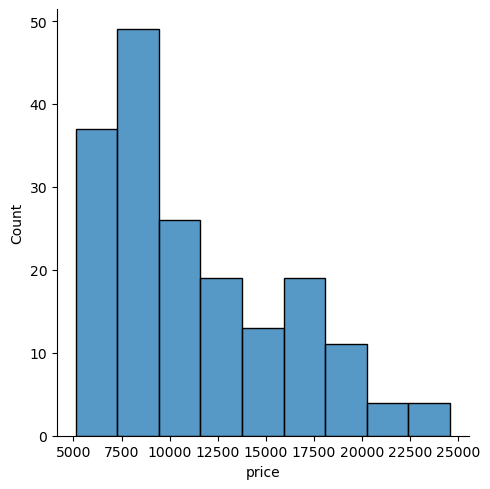

In [48]:
sns.displot(df4['price'])

In [49]:
t = df3['price'].values
x = df3.drop('price', axis=1).values

x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=1)

model = LinearRegression()
model.fit(x_train, t_train)

print('train score: ',  model.score(x_train, t_train))
print('test score: ',  model.score(x_test, t_test))

train score:  0.9776827981599897
test score:  0.9197669248900617


In [50]:
t = df4['price'].values
x = df4.drop('price', axis=1).values

x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=1)

model = LinearRegression()
model.fit(x_train, t_train)

print('train score: ',  model.score(x_train, t_train))
print('test score: ',  model.score(x_test, t_test))

train score:  0.961116627981775
test score:  0.7168256339604028
